
###[LLM Bootcamp](https://aiplanet.com/bootcamps/llm-bootcamp)

#**Intro to T5**

**T5** means **T**ext **T**o **T**ext **T**ransfer **T**ransformer. It can be used , **G**enerative **Q**uestion-**A**nwering (GQA), summarization, and much more.

##**Facts about T5**

 T5 model is a type of encoder-decoder architecture that has been pre-trained using a combination of unsupervised and supervised tasks. In this pre-training process, each task is transformed into a text-to-text format. The T5 model demonstrates effective performance across a range of activities without requiring additional modifications. This is achieved by adding a distinct prefix to the input that corresponds to the specific activity at hand. For instance, in the case of translation: Translate from English to German: in terms of summarization: provide a summary of:

 The preliminary training consists of both supervised and unsupervised training. On the downstream tasks provided by the GLUE and SuperGLUE benchmarks, supervised training is conducted (converting them into text-to-text tasks, as explained above).

Self-supervised training employs tokens that have been corrupted by arbitrarily removing 15% of the tokens and replacing them with individual sentinel tokens (if multiple consecutive tokens are marked for removal, the entire group is replaced with a single sentinel token). The input of the encoder is the corrupted sentence, while the input of the decoder is the original sentence. The output of the encoder is the dropped out tokens delimited by their sentinel tokens.

##**Variations of T5**

 We have:
* **t5-small** - trained on 60million parameters
* **t5-base** - trained on 220million parameters
* **t5-large** - trained on 770million parameters
* **t5-3B** - trained on 3billion parameters
* **t5-11B** - trained on 11Billion parameters.

On the basis of the original T5 model, Google has released the subsequent works:

* **T5v1.1** is an enhanced version of T5 with architectural modifications and is pre-trained on C4 without supervised task blending.

* **mT5 model** is a multilingual T5. It is pre-trained on the corpus of 101 languages found in the mC4 database.

* **byT5** is a T5 model that has been trained on byte sequences as opposed to SentencePiece subword token sequences.

* **UL2** is a T5-like model that has been trained on a variety of denoising objectives.

* **Flan-T5** is a method of pre-training founded on prompting. The Flan-T5 are T5 models trained on the Flan dataset collection, which contains taskmaster2, djaym7/wiki_dialog, deepmind/code_contests, lambada, gsm8k, aqua_rat, esnli, quasc, and qed.

* **FLan-UL2** is a UL2 model that has been fine-tuned using "Flan" prompt tuning and data collection.

* **UMT5** UmT5 is a multilingual T5 model trained on an enhanced and updated mC4 multilingual corpus, consisting of 29 trillion characters in 107 languages, utilising a novel sampling technique, UniMax.

Generally, T5 employs scalar relative embeddings. Encoder input padding can be performed both to the left and right.

The core idea of the library is _"Teacher forcing"_. This is when the EOS token is appended to the target sequence, which corresponds to the labels. The PAD token is used as the sequence-starting token. T5 can be trained / honed both under supervision and independently.
Chains may consist of multiple components from several modules:

* **Prompts templates**: These are templates for different types of prompts. Like "chatbot" style templates, ELI5 question-answering, etc

* **LLMs**: Large language models like GPT-3, BLOOM, etc

* **Agents**: Agents use LLMs to decide what actions should be taken, tools like web search or calculators can be used, and all packaged into logical loop of operations.

* **Memory**: Short-term memory, long-term memory.
Memory: Short-term memory, long-term memory.

##**T5 Framework**
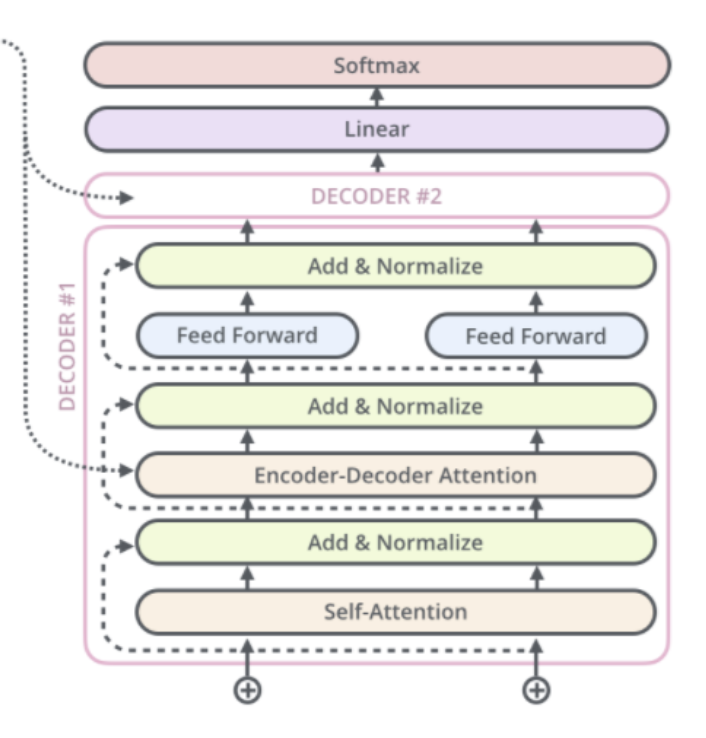

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fgoogles-t5-transformer-theory-ffd0acc738d2&psig=AOvVaw3kpUCLpdS0HVne-Ta3GTDE&ust=1693109641017000&source=images&cd=vfe&opi=89978449&ved=0CA8QjRxqFwoTCKCY-Ye7-YADFQAAAAAdAAAAABAh)

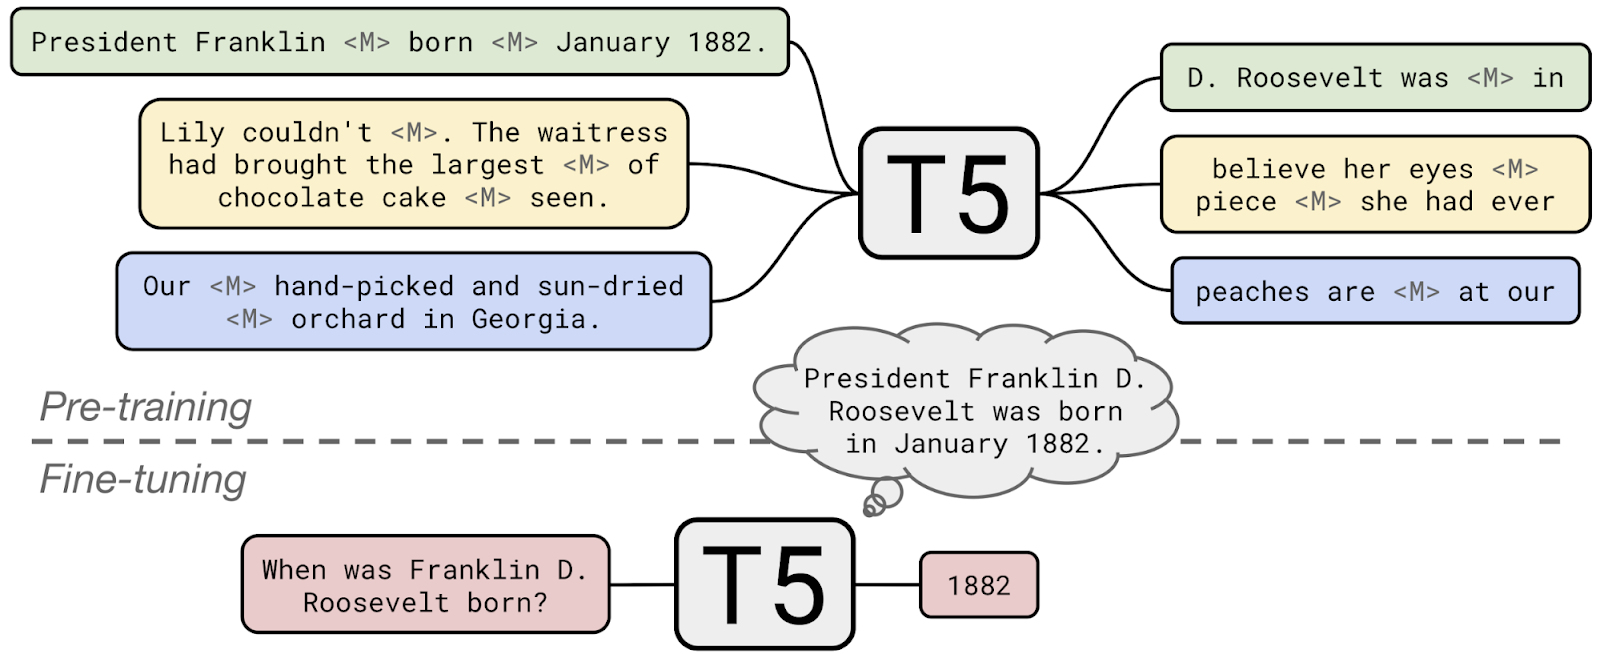 [Source](https://ai.googleblog.com/2020/02/exploring-transfer-learning-with-t5.html)

# **Practice session**

In this configuration, input sequence segments are masked by so-called sentinel tokens (also known as unique mask tokens), and the output sequence is formed by concatenating the same sentinel tokens with the actual masked tokens. Each sentinel token signifies a distinct mask token for this sentence and should begin with,,,,... T5Tokenizer has 100 sentinel tokens available by default.

For example, the sentence "The cute baby sleeps in the crib" with "cute baby" and "the" masked should be processed as follows:


In [ ]:
#Install necessary libraries

!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.2 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:00


##**Text generation**

In [ ]:
#import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer("The <extra_id_0> sleep in <extra_id_1> crib", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> cute baby <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids

# the forward function automatically creates the correct decoder_input_ids
loss = model(input_ids=input_ids, labels=labels).loss
loss.item()

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=True`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


3.3609116077423096

## **Text summarization**

In [ ]:
#example from https://wandb.ai/mukilan/T5_transformer/reports/Exploring-Google-s-T5-Text-To-Text-Transformer-Model--VmlldzoyNjkzOTE2

one_piece_sequence = ("The series focuses on Monkey D. Luffy, a young man made of rubber, who, inspired by his childhood idol,"
             "the powerful pirate Red-Haired Shanks, sets off on a journey from the East Blue Sea to find the mythical treasure,"
             "the One Piece, and proclaim himself the King of the Pirates. In an effort to organize his own crew, the Straw Hat Pirates,"
             "Luffy rescues and befriends a pirate hunter and swordsman named Roronoa Zoro, and they head off in search of the "
             "titular treasure. They are joined in their journey by Nami, a money-obsessed thief and navigator; Usopp, a sniper "
             "and compulsive liar; and Sanji, a perverted but chivalrous cook. They acquire a ship, the Going Merry, and engage in confrontations"
             "with notorious pirates of the East Blue. As Luffy and his crew set out on their adventures, others join the crew later in the series, "
             "including Tony Tony Chopper, an anthropomorphized reindeer doctor; Nico Robin, an archaeologist and former Baroque Works assassin; "
             "Franky, a cyborg shipwright; Brook, a skeleton musician and swordsman; and Jimbei, a fish-man helmsman and former member of the Seven "
             "Warlords of the Sea. Once the Going Merry is damaged beyond repair, Franky builds the Straw Hat Pirates a new ship, the Thousand Sunny,"
             "Together, they encounter other pirates, bounty hunters, criminal organizations, revolutionaries, secret agents, and soldiers of the"
             "corrupt World Government, and various other friends and foes, as they sail the seas in pursuit of their dreams.")
inputs = tokenizer.encode("summarize: " + one_piece_sequence,
                          return_tensors='pt',
                          max_length=512,
                          truncation=True)
summarization_ids = model.generate(inputs, max_length=80, min_length=40, length_penalty=5., num_beams=2)
summarization = tokenizer.decode(summarization_ids[0])
print(summarization)


<pad>the Straw Hat Pirates befriends a pirate hunter and swordsman named Roronoa Zoro. they are joined in their journey by Nami, a money-obsessed thief and navigator. others join the crew later in the series, including Tony Tony Chopper, an anthropomorphized reinde


##**Language translation**

In [ ]:
#from transformers import T5Tokenizer, T5ForConditionalGeneration

#tokenizer = T5Tokenizer.from_pretrained("t5-small")
#model = T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer("translate English to German: I love my country.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Ich liebe mein Land.


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
input_ids = tokenizer("The <extra_id_0> walks in <extra_id_1> park", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> supercute <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids

# the forward function automatically creates the correct decoder_input_ids
loss = model(input_ids=input_ids, labels=labels).loss
loss.item()

4.760329723358154

## **Sentence similarity**

In [ ]:
stsb_sentence_1 = ("Harrison was fighting in the war.")
stsb_sentence_2 = ("Harrison's fighting style is comical.")
input_ids = tokenizer("stsb sentence 1: "+stsb_sentence_1+" sentence 2: "+stsb_sentence_2, return_tensors="pt").input_ids
stsb_ids = model.generate(input_ids)
stsb = tokenizer.decode(stsb_ids[0],skip_special_tokens=True)
print(stsb)


4.0


##**Limitations of T5 Model**

* Shorter input sequences (usually fewer than 512 tokens) using T5. This is due to "quadratic computation growth".
* Computational resources grow quadratically in proportion to the length of the input sequence through increase in training time and memory use.

###**Summary of T5 model training**
* **Vocabulary** - Sentence piece
* **Hyperparameters** - baseline AdaFactor optimizer, inverse square root learning rateschedule for pre-training, constant learning rate for fine-tuning, dropout regularization,vocabulary,
* **Metrics** - Loss.item()
* **Datasets** - “Colossal Clean Crawled Corpus” (C4) contains heuristically cleaned Common Crawl web dump text.
* **Lessons** - Text-to-text framework makes it easy to train a single model on several text problems using the same loss function and decoding technique.This method works for generating tasks like abstractive summarization, classification tasks like natural language inference, and regression tasks like STS-B.
* **Architectures** - Some transfer learning for NLP research has investigated architectural versions of the Transformer, but found the basic encoder-decoder form performed best in the text-to-text system. Encoder-decoder models have the same computational cost as “encoder-only” (e.g. BERT) or “decoder-only” (linguistic model) architectures but employ twice as many parameters.
* **Training** - To make unsupervised pre-training more computationally efficient, recommend objectives with short target sequences.



##**References**
* https://dl.acm.org/doi/epdf/10.5555/3455716.3455856
* https://huggingface.co/docs/transformers/v4.32.0/en/model_doc/t5#transformers.T5Tokenizer
* https://wandb.ai/mukilan/T5_transformer/reports/Exploring-Google-s-T5-Text-To-Text-Transformer-Model--VmlldzoyNjkzOTE2
* https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fgoogles-t5-transformer-theory-ffd0acc738d2&psig=AOvVaw3kpUCLpdS0HVne-Ta3GTDE&ust=1693109641017000&source=images&cd=vfe&opi=89978449&ved=0CA8QjRxqFwoTCKCY-Ye7-YADFQAAAAAdAAAAABAh


**T5** notebook was compiled by **[Mary Adewunmi](https://maryadewunmi.github.io/)** for **[LLM Bootcamp](https://aiplanet.com/bootcamps/llm-bootcamp)** using the resources in the references.